In [ ]:
%pip install pandas


In [ ]:
%pip install  numpy matplotlib

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#Define the file paths 
DATA_PATH = "C:\\Users\\nicko\\Downloads\\rees46_customer_model.csv\\rees46_customer_model.csv"
OUT_FIG = Path("../results/figures")
OUT_TAB = Path("../results/tables")

OUT_FIG.mkdir(parents=True, exist_ok=True)
OUT_TAB.mkdir(parents=True, exist_ok=True)


In [9]:
dictionary = pd.read_csv("C:\\Users\\nicko\\Downloads\\tmu-cind119-churn-rees46\\data\\rees46_data_dictionary.csv", encoding='latin-1')
dictionary

,Set,Attribute,Description,Variable name
0,Dependent,churn event,No transaction in future period.,target_event
1,Dependent,retention campaign profit,Incremental profit in future period.,target_actual_profit
2,Recency,session recency,time duration from the last session [days],session_recency
3,Recency,purchase recency,time duration from the last transaction [days],purchase_recency
4,Recency,time to session,time between sessions [days],inter_session_time
5,Recency,time to purchase,time between purchases [days],inter_purchase_time
6,Frequency,session number,user-session number [n],session_number
7,Frequency,purchase number,user-purchase number [n],purchase_number
8,Frequency,session daily frequency *,session count per day,session_count_ratio
9,Frequency,interaction daily frequency *,interaction count per day,click_count_ratio


In [6]:
df = pd.read_csv(DATA_PATH)
df.head()

,row_id,user_id,length_mean,start_year_mean,start_yearday_mean,start_month_mean,start_monthday_mean,start_week_mean,start_weekday_mean,start_isweekend_mean,...,purchase_latent_factor14,purchase_latent_factor15,purchase_latent_factor16,purchase_latent_factor17,target_event,target_revenue,target_customer_value,time_step,target_customer_value_lag1,target_actual_profit
0,31,522576412,10133.678750,2019.3250,241.65000,8.400000,16.875000,33.825000,4.225000,0.300000,...,0.633005,0.063525,0.000000,0.000000,0,3403.83,171.760358,0,90.148425,-13.279611
1,53,551695186,5.359195,2019.3620,222.05173,7.827586,14.655172,31.448277,4.034483,0.258621,...,0.395069,0.267275,0.000000,0.000000,1,0.00,387.102758,0,445.168171,3.592337
2,65,561472000,4.885714,2019.0000,297.54285,10.114285,21.000000,43.142857,2.942857,0.285714,...,0.000000,0.000000,0.000000,0.000000,1,0.00,347.097991,0,399.162689,3.216008
3,85,585643355,4175.082759,2019.8966,106.00000,3.931035,17.655172,15.896552,3.655172,0.206897,...,0.165644,0.000000,0.165603,0.263806,0,937.86,279.270244,0,321.607950,-13.185855
4,133,520792937,3.325601,2019.3196,212.86598,7.556701,13.711340,30.989690,3.958763,0.350515,...,0.000000,0.000000,0.048937,0.000000,1,0.00,91.360471,0,105.064542,0.732248


In [11]:
df.shape

(112610, 276)

# Build a custom data overview tool:
- Scan every column in my dataset and builds a DataFrame Summary describing each column's type, unique values, missing data and range(min-max)

In [15]:
# Drop unuseful columns :
df.drop('row_id',axis=1,inplace=True)

df.drop('user_id',axis=1,inplace=True)

In [12]:
def more_info(data):
  n_unique=[]
  uniques=[]
  data_type=[]
  missing_values=[]
  missing_percentage=[]
  columns=[]
  max_values=[]
  min_values=[]

  for col in data.columns:
    columns.append(col)
    n_unique.append(data[col].nunique())
    uniques.append(data[col].unique())
    data_type.append(data[col].dtype)
    missing_values.append(data[col].isnull().sum())
    missing_percentage.append((data[col].isnull().sum()/data.shape[0])*100)
    if data[col].dtype!='object':
      max_values.append(data[col].max())
      min_values.append(data[col].min())
    else:
      max_values.append(np.nan)
      min_values.append(np.nan)
  more_info_df = pd.DataFrame({'column': columns,
                                'n_unique': n_unique,
                                'uniques': uniques,
                                'data_type': data_type,
                                'missing_values': missing_values,
                                'missing_percentage': missing_percentage,
                               'max_values':max_values,
                               'min_values':min_values})
  return more_info_df

In [16]:
info=more_info(df)
info

,column,n_unique,uniques,data_type,missing_values,missing_percentage,max_values,min_values
0,length_mean,90714,"[10133.678749999995, 5.359195402298854, 4.8857...",float64,0,0.0,79235.610606,0.000000
1,start_year_mean,5536,"[2019.325, 2019.362, 2019.0, 2019.8966, 2019.3...",float64,0,0.0,2020.000000,2019.000000
2,start_yearday_mean,65728,"[241.65, 222.05173, 297.54285, 106.0, 212.8659...",float64,0,0.0,365.000000,1.000000
3,start_month_mean,24338,"[8.4, 7.827586, 10.114285, 3.9310346, 7.556701...",float64,0,0.0,12.000000,1.000000
4,start_monthday_mean,27835,"[16.875, 14.655172, 21.0, 17.655172, 13.71134,...",float64,0,0.0,31.000000,1.000000
...,...,...,...,...,...,...,...,...
269,target_revenue,68537,"[3403.8300000000004, 0.0, 937.86, 546.68, 7286...",float64,0,0.0,527776.780000,0.000000
270,target_customer_value,112592,"[171.76035756460058, 387.1027575458951, 347.09...",float64,0,0.0,40582.335231,-290.189572
271,time_step,7,"[0, 1, 2, 3, 4, 5, 6]",int64,0,0.0,6.000000,0.000000
272,target_customer_value_lag1,90988,"[90.1484250547176, 445.1681711777794, 399.1626...",float64,0,0.0,40582.335231,-290.189572


In [ ]:
#check to see if there is any column with 1 unique value adn remove them
info[info['n_unique']==1]

,column,n_unique,uniques,data_type,missing_values,missing_percentage,max_values,min_values
87,session_number_min,1,[1],int64,0,0.0,1.0,1.0
90,purchase_number_min,1,[1],int64,0,0.0,1.0,1.0
102,haspurchase_max,1,[1],int64,0,0.0,1.0,1.0


In [ ]:
#Drop those feature since it only add noises to the model
df.drop(columns=info[info['n_unique']==1]['column'],axis=1,inplace=True)

In [ ]:
#check duplicates and missing values
df.duplicated().sum()
info[info['missing_values']>0]

#no duplicates and missing values found


,column,n_unique,uniques,data_type,missing_values,missing_percentage,max_values,min_values


In [22]:
#quickly identify non-numeric columns that may need encoding
non_numeric_cols = df.select_dtypes(include=['object']).columns

print("Non-numeric columns that may need encoding:")
print(non_numeric_cols)

Non-numeric columns that may need encoding:
Index([], dtype='object')


# TOP CORRELATION WITH TARGET VARIABLE 


In [24]:
# Cell — Find top correlations with target_event

target = 'target_event'

# Select only numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove the target itself from the list
if target in num_cols:
    num_cols.remove(target)

# Compute Pearson correlation with the target
corr = df[num_cols].corrwith(df[target]).dropna()

# Sort by absolute correlation (strongest first)
corr_sorted = corr.abs().sort_values(ascending=False).to_frame('abs_corr')
corr_sorted['corr'] = corr[corr_sorted.index]
top_corr = corr_sorted.head(20)


top_corr


,abs_corr,corr
target_actual_profit,0.926032,0.926032
session_recency_min,0.534438,0.534438
purchase_recency_min,0.516597,0.516597
session_recency_mean,0.477474,0.477474
purchase_recency_mean,0.474895,0.474895
purchase_recency_max,0.367690,0.367690
session_recency_max,0.352294,0.352294
time_step,0.347981,-0.347981
purchase_recency_sum,0.343076,0.343076
session_recency_cv,0.330524,-0.330524


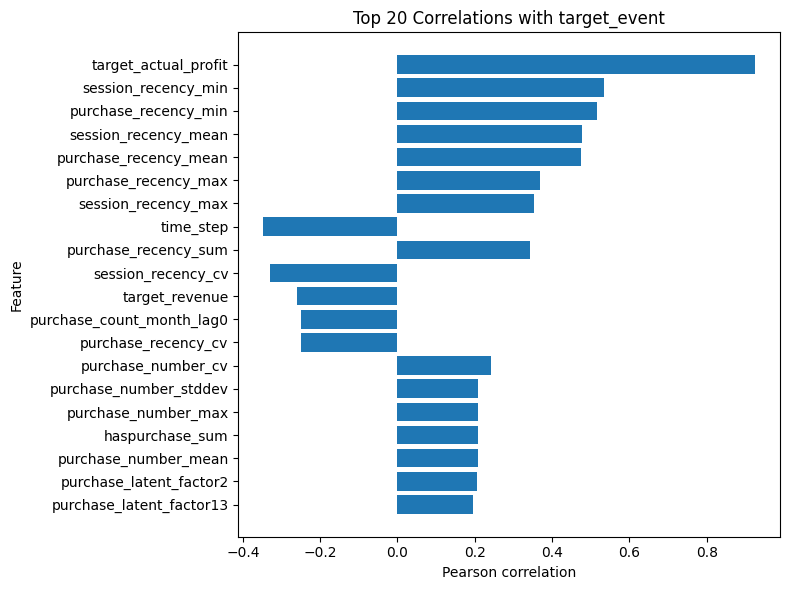

In [25]:
#  — Visualize top correlations with target_event

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.barh(top_corr.index, top_corr['corr'])
plt.title("Top 20 Correlations with target_event")
plt.xlabel("Pearson correlation")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # highest correlation on top
plt.tight_layout()

# Save figure for GitHub
plt.savefig("../results/figures/top_correlations_with_target.png", dpi=150)
plt.show()

Summary statistics of the most correlated features

In [29]:
# Cell — Summary stats for top correlated features with target_event

top_corr_features = [
    'target_actual_profit', 'session_recency_min', 'purchase_recency_min',
    'session_recency_mean', 'purchase_recency_mean', 'purchase_recency_max',
    'session_recency_max', 'time_step', 'purchase_recency_sum',
    'session_recency_cv', 'target_revenue', 'purchase_count_month_lag0',
    'purchase_recency_cv', 'purchase_number_cv', 'purchase_number_stddev',
    'purchase_number_max', 'haspurchase_sum', 'purchase_number_mean',
    'purchase_latent_factor2', 'purchase_latent_factor13'
]

# Filter only existing columns (some names might vary)
existing_cols = [col for col in top_corr_features if col in df.columns]

# Generate summary stats
summary_topcorr = df[existing_cols].describe().T
summary_topcorr = summary_topcorr[['count', 'mean', 'std', 'min', 'max']]
summary_topcorr = summary_topcorr.rename(columns={
    'count': 'Count',
    'mean': 'Mean',
    'std': 'Std Dev',
    'min': 'Min',
    'max': 'Max'
}).round(2)

# Format large numbers
summary_topcorr['Count'] = summary_topcorr['Count'].apply(lambda x: f"{int(x):,}")

# Save and display
summary_topcorr.to_csv("../results/tables/summary_top_correlated_features.csv")
summary_topcorr.head(20)


,Count,Mean,Std Dev,Min,Max
target_actual_profit,"112,610",-7.81,8.47,-13.59,189.97
session_recency_min,"112,610",13.33,23.57,0.00,174.56
purchase_recency_min,"112,610",17.91,25.45,0.00,176.47
session_recency_mean,"112,610",48.78,33.32,0.00,177.29
purchase_recency_mean,"112,610",47.69,34.27,0.00,177.85
purchase_recency_max,"112,610",78.85,50.37,0.00,179.75
session_recency_max,"112,610",86.00,51.08,0.01,179.75
time_step,"112,610",2.38,1.81,0.00,6.00
purchase_recency_sum,"112,610",1350.33,1902.72,0.00,130536.22
session_recency_cv,"112,610",0.52,0.32,0.00,3.49


These statistics tell several things about the customers whose behaviroal features are most correlated to churn: 

### Profit and Revenue Patterns
The variable target_actual_profit has a negative mean (−7.81) and a small standard deviation, indicating that most customers generate little to no profit, while a few are highly profitable outliers (maximum ≈ 190 CU).
target_revenue is highly right-skewed (mean = 2,881 CU, std = 7,639 CU, max ≈ 528,000 CU), showing that most customers spend very little, but a small minority contribute disproportionately to total sales — a typical long-tail e-commerce pattern.

### Activity Recency
The average session_recency_mean (≈ 49 days) and purchase_recency_mean (≈ 48 days) suggest that users typically return or buy about once every one and a half months.
The large standard deviations (≈ 33–34 days) indicate strong variation between customers: some visit frequently, others go inactive for long periods.
Churned customers are likely found at the upper end of this distribution (larger recency values).

### Session Variability
session_recency_min (≈ 13 days) and session_recency_max (≈ 86 days) show wide differences in user activity cycles.
The session_recency_cv (≈ 0.52) suggests moderate inconsistency — customers do not maintain regular visiting habits.

### Purchase Behaviour
purchase_count_month_lag0 (≈ 1.55) shows low monthly purchase frequency: most users buy once or not at all per month.
purchase_number_mean (≈ 12) and purchase_number_max (≈ 23) reveal a long-tailed pattern where only a small portion of users are repeat or heavy buyers.
The high variability (purchase_number_stddev ≈ 6.9; max 503) confirms the presence of outliers — “power users” or corporate clients.

### Latent Purchase Factors
purchase_latent_factor2 and purchase_latent_factor13 have low average values (< 0.4), indicating weak and sparse latent preference signals across the customer base.

### Overall Behavioural Pattern
Most customers interact sporadically, purchase infrequently, and yield low or even negative profit — classic high-churn behaviour.
A small fraction of highly active, high-spending users dominate total revenue, while the majority show declining engagement (high recency, low frequency).
This makes the dataset well-suited for churn-prediction modeling: it represents an imbalanced, behaviourally diverse, and profit-skewed customer population